In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

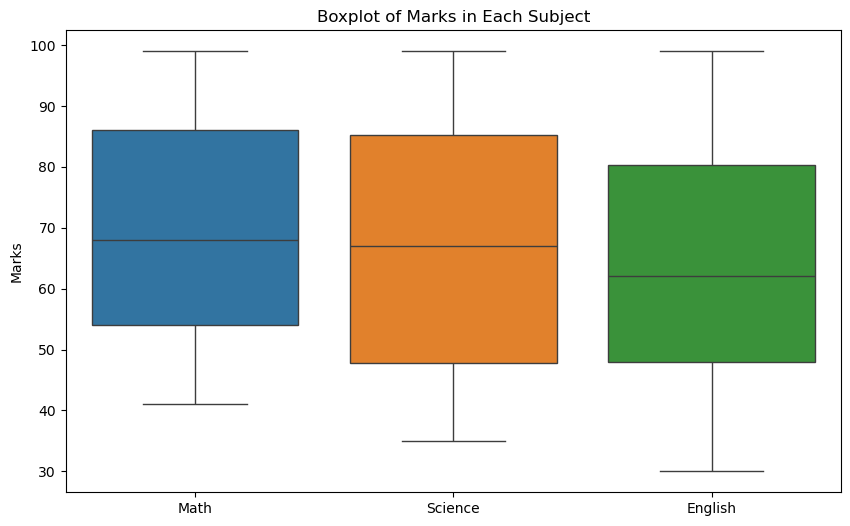

(       Student  Math  Science  English    Average
 14  Student_15    92       97       88  92.333333
 33  Student_34    83       99       89  90.333333
 0    Student_1    78       96       97  90.333333
 27  Student_28    99       82       79  86.666667
 59  Student_60    99       91       62  84.000000,
           mean        std
 Math     69.58  18.031499
 Science  66.88  20.386805
 English  63.96  20.011068,
 'Science')

In [8]:
#CASE 1
'''You are given data of 100 students containing their marks in Math, Science, and English. 
(a) Using Pandas, calculate the average marks for each student and identify the top 5 performers. 
(b) Compute subject-wise average and standard deviation; comment which subject shows the 
highest variation. 
(c) Draw a boxplot for each subject and comment on outliers. '''

np.random.seed(42)
df = pd.DataFrame({
    'Student': [f'Student_{i+1}' for i in range(100)],
    'Math': np.random.randint(40, 100, 100),
    'Science': np.random.randint(35, 100, 100),
    'English': np.random.randint(30, 100, 100)
})
df['Average'] = df[['Math','Science','English']].mean(axis=1)
top5 = df.sort_values('Average', ascending=False).head(5)
subject_stats = df[['Math','Science','English']].agg(['mean','std']).T
highest_variation_subject = subject_stats['std'].idxmax()
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Math','Science','English']])
plt.title("Boxplot of Marks in Each Subject")
plt.ylabel("Marks")
plt.show()

top5, subject_stats, highest_variation_subject


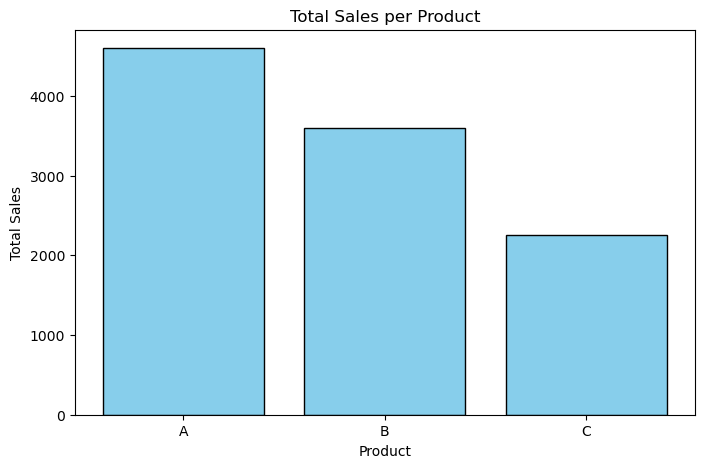

(10450,
 Region
 East     2700
 North    2650
 South    2500
 West     2600
 Name: Total, dtype: int64,
 'East',
 Product
 A    4600
 B    3600
 C    2250
 Name: Total, dtype: int64)

In [9]:
"""Case Study 2 – Sales Data Exploration 
A company records sales transactions in a dataset with columns: Product, Quantity, Price, 
Region. 
(a) Add a new column Total = Quantity × Price and compute overall revenue. 
(b) Group data by region and identify which region contributes the most sales. 
(c) Plot a histogram of total sales per product and discuss which products are underperforming."""

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Quantity': [10, 5, 8, 12, 6, 4, 15, 7, 3, 9],
    'Price': [100, 200, 150, 100, 200, 150, 100, 200, 150, 100],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South']
})
df['Total'] = df['Quantity'] * df['Price']
overall_revenue = df['Total'].sum()
region_sales = df.groupby('Region')['Total'].sum()
top_region = region_sales.idxmax()
product_sales = df.groupby('Product')['Total'].sum()
plt.figure(figsize=(8,5))
plt.bar(product_sales.index, product_sales.values, color='skyblue', edgecolor='black')
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales per Product")
plt.show()
overall_revenue, region_sales, top_region, product_sales


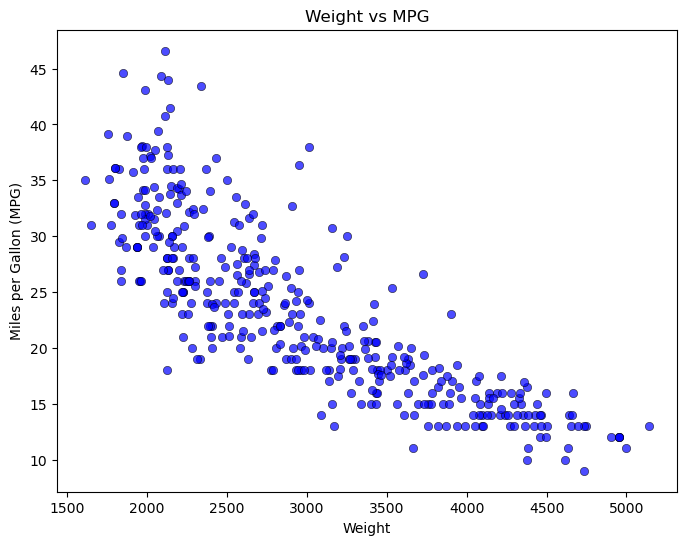

mpg             1.000000
model year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

In [10]:
"""Case Study 3 – Predicting Fuel Efficiency (Auto MPG Dataset) 
You are analyzing the Auto MPG dataset (UCI Repository) with features: mpg, cylinders, 
displacement, horsepower, weight, acceleration, model year, origin. 
(a) Compute the correlation of mpg with each numeric feature and discuss which factors 
influence fuel efficiency most. 
(b) Plot a scatter plot of weight vs mpg; describe the trend you observe."""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("auto-mpg.csv")
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

correlation = df.corr(numeric_only=True)['mpg'].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='weight', y='mpg', color='blue', alpha=0.7, edgecolor='k')
plt.title("Weight vs MPG")
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon (MPG)")
plt.show()

correlation

